In [1]:
from pathlib import Path
import pandas as pd
import math

import matplotlib.pyplot as plt
%matplotlib notebook

import numpy as np
from scipy import special
from lmfit import Model

In [2]:
input_data_file = 'data/march_dollase_result_fitting_row0.txt'
assert Path(input_data_file).exists() 

## importing the data to fit from ascii file 

This file has been generated by the notebook bragg_edge_fiting.ipynb

In [3]:
o_data = pd.read_csv(input_data_file,
                     names=('file index', 'TOF', 'lambda', 'average counts'),
                     skiprows=5,
                    )

In [4]:
o_data

,file index,TOF,lambda,average counts
0,410,4535.68,0.033583,0.231269
1,411,4545.92,0.033614,0.230515
2,412,4556.16,0.033645,0.230285
3,413,4566.40,0.033676,0.231071
4,414,4576.64,0.033707,0.231156
...,...,...,...,...
211,621,6696.32,0.040158,0.215039
212,622,6706.56,0.040189,0.213158
213,623,6716.80,0.040220,0.214396
214,624,6727.04,0.040251,0.213035


In [26]:
tof_axis = np.array(o_data['TOF'])
lambda_axis = np.array(o_data['lambda'])
#index_axis = np.array(o_data['file index'])
index_axis = np.arange(len(tof_axis))

counts = np.array(o_data['average counts'])

# # testing something
counts[0: 123] = 0.205
# counts[146: ] = 0.221

<IPython.core.display.Javascript object>


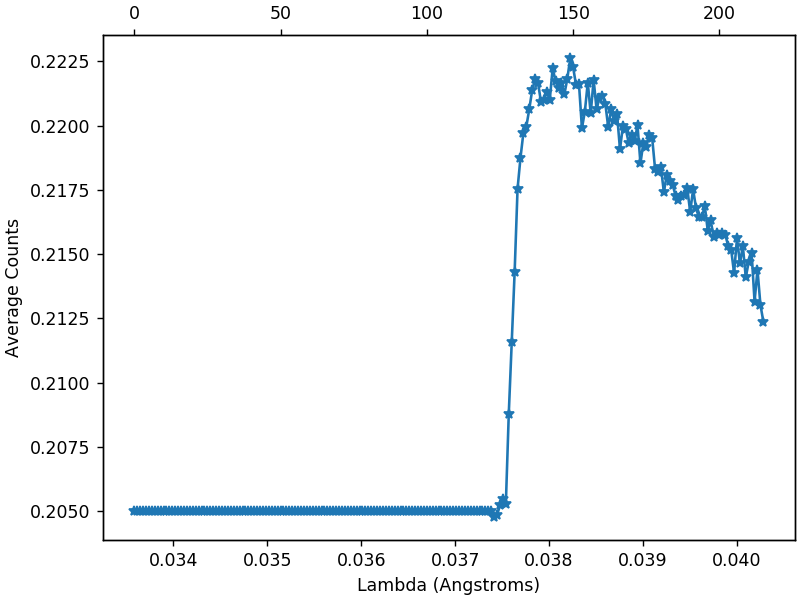

In [27]:
fig, ax = plt.subplots(constrained_layout=True)
ax2 = ax.twiny()

ax.plot(lambda_axis, counts, '*')
ax.set_xlabel("Lambda (Angstroms)")
ax.set_ylabel("Average Counts")
ax2.plot(index_axis, counts)

In [14]:
def march_dollase_basic_fit(t, d_spacing, sigma, alpha, a1, a2):
    t0 = 2 * d_spacing
    term2 = special.erfc(-((t - t0) / (sigma * math.sqrt(2))) + sigma / alpha)
    term1 = np.exp((t - t0) / alpha + (sigma * sigma) / (2 * alpha * alpha))
    term0 = special.erfc(-((t - t0) / (sigma * math.sqrt(2))))
    y = a1 + a2 * (term0 - (term1 * term2))
    return y

### Set up initial parameters 

In [28]:
def get_d_spacing():
    from_lambda = 0.0374
    to_lambda = 0.038
    average_lambda = np.mean([from_lambda, to_lambda])
    d_spacing = average_lambda/2.
    return d_spacing

In [29]:
def get_a1():
    right_index_left_part = 121
    y_axis = counts[: right_index_left_part]
    return np.mean(y_axis)

In [30]:
def get_a2(a1):
    left_index_right_part = 141
    y_axis = counts[left_index_right_part:]
    _mean_y_axis = np.mean(y_axis)
    return np.abs(_mean_y_axis - a1)

### Fit 1 - a1

In [31]:
d_spacing = get_d_spacing()
a1 = get_a1()
a2 = get_a2(a1)
sigma = 3.5
alpha = 4.5

print(f"d_spacing: {d_spacing}")
print(f"a1: {a1}")
print(f"a2: {a2}")
print(f"sigma: {sigma}")
print(f"alpha: {alpha}")

d_spacing: 0.01885
a1: 0.20500000000000002
a2: 0.013329387599999992
sigma: 3.5
alpha: 4.5


a1_calculated: 0.2019973955371978


<IPython.core.display.Javascript object>


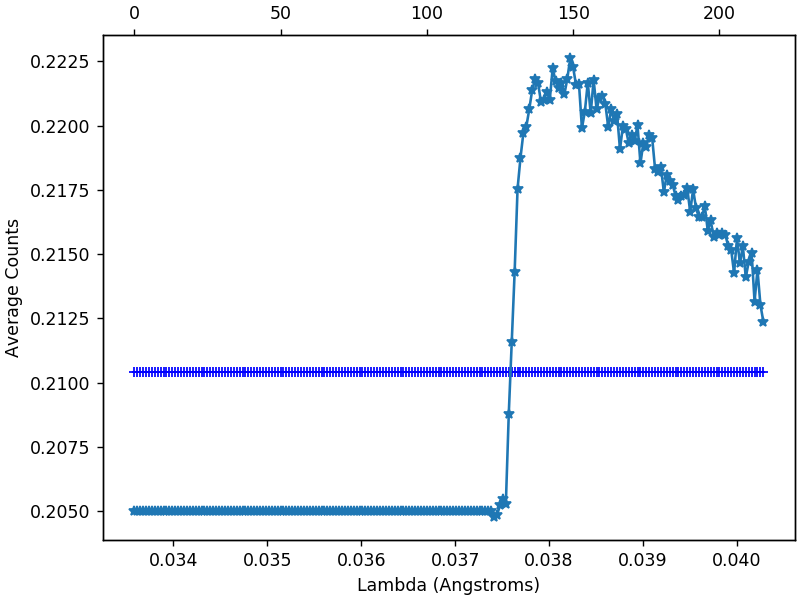

In [32]:
gmodel = Model(march_dollase_basic_fit, missing='drop')
params = gmodel.make_params()
params.add('d_spacing', value=d_spacing, vary=False)
params.add('sigma', value=sigma, vary=False)
params.add('alpha', value=alpha, vary=False)
params.add('a1', value=a1, vary=True)
params.add('a2', value=a2, vary=False)

result = gmodel.fit(counts, params, t=lambda_axis)

a1_calculated = result.params['a1'].value
print(f"a1_calculated: {a1_calculated}")

counts_after_fit_1 = march_dollase_basic_fit(lambda_axis, d_spacing, sigma, alpha, a1_calculated, a2)


fig, ax = plt.subplots(constrained_layout=True)
ax2 = ax.twiny()

ax.plot(lambda_axis, counts, '*')
ax.plot(lambda_axis, counts_after_fit_1, 'b+')
ax.set_xlabel("Lambda (Angstroms)")
ax.set_ylabel("Average Counts")
ax2.plot(index_axis, counts)

### Fit 2 - a2

In [33]:
a1 = a1_calculated

print(f"d_spacing: {d_spacing}")
print(f"a1: {a1}")
print(f"a2: {a2}")
print(f"sigma: {sigma}")
print(f"alpha: {alpha}")

d_spacing: 0.01885
a1: 0.2019973955371978
a2: 0.013329387599999992
sigma: 3.5
alpha: 4.5


a2_calculated: 0.013328823925772905


<IPython.core.display.Javascript object>


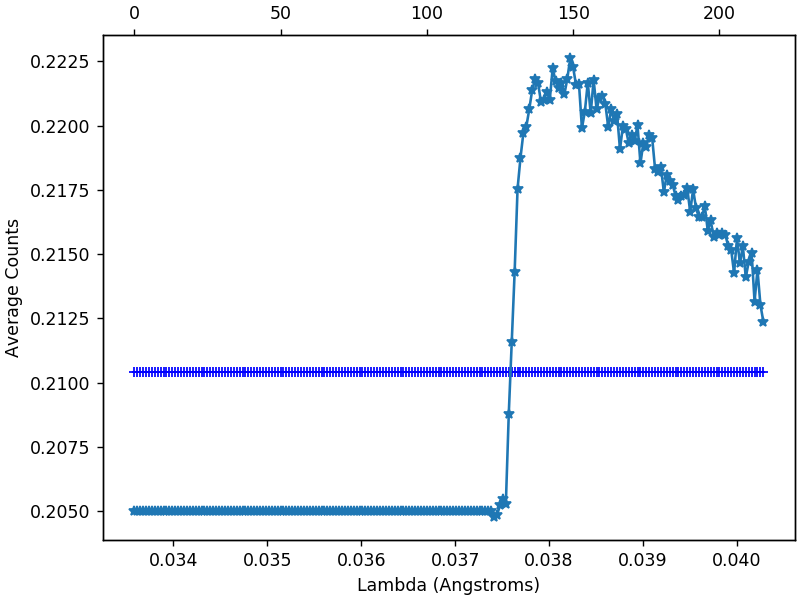

In [34]:
gmodel = Model(march_dollase_basic_fit, missing='drop')
params = gmodel.make_params()
params.add('d_spacing', value=d_spacing, vary=False)
params.add('sigma', value=sigma, vary=False)
params.add('alpha', value=alpha, vary=False)
params.add('a1', value=a1, vary=False)
params.add('a2', value=a2, vary=True)
result = gmodel.fit(counts, params, t=lambda_axis)

a2_calculated = result.params['a2'].value
print(f"a2_calculated: {a2_calculated}")

counts_after_fit_2 = march_dollase_basic_fit(lambda_axis, d_spacing, sigma, alpha, a1, a2_calculated)

fig, ax = plt.subplots(constrained_layout=True)
ax2 = ax.twiny()

ax.plot(lambda_axis, counts, '*')
ax.plot(lambda_axis, counts_after_fit_2, 'b+')
ax.set_xlabel("Lambda (Angstroms)")
ax.set_ylabel("Average Counts")
ax2.plot(index_axis, counts)

### Fit 3 - d_spacing, sigma, alpha

In [35]:
d_spacing = get_d_spacing()
a1 = a1_calculated
a2 = a2_calculated

print(f"d_spacing: {d_spacing}")
print(f"a1: {a1}")
print(f"a2: {a2}")
print(f"sigma: {sigma}")
print(f"alpha: {alpha}")

d_spacing: 0.01885
a1: 0.2019973955371978
a2: 0.013328823925772905
sigma: 3.5
alpha: 4.5


d_spcaing_calculated: 0.019124384515732937
sigma_calculated: 0.0022808100578752695
alpha_calculated: 0.0007740995853842219


<IPython.core.display.Javascript object>


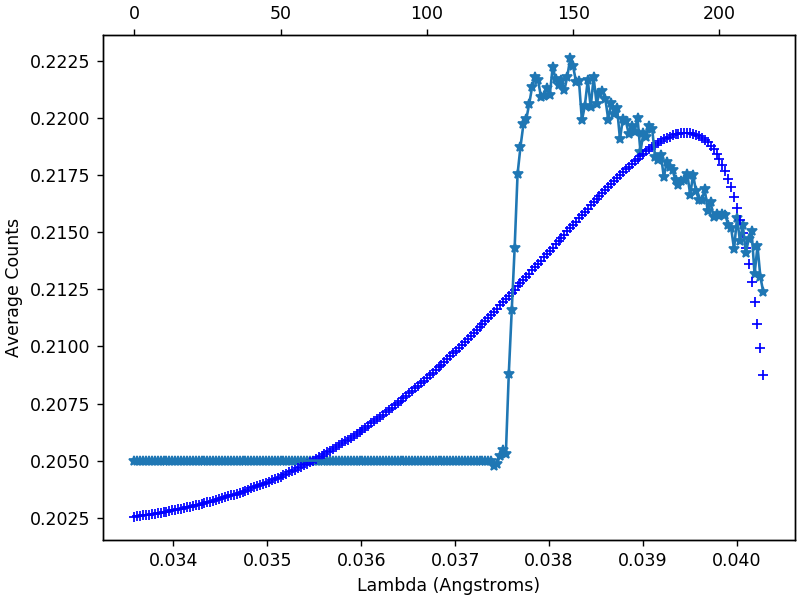

In [36]:
gmodel = Model(march_dollase_basic_fit, missing='drop')
params = gmodel.make_params()
params.add('d_spacing', value=d_spacing, vary=True)
params.add('sigma', value=sigma, vary=True)
params.add('alpha', value=alpha, vary=True)
params.add('a1', value=a1, vary=False)
params.add('a2', value=a2, vary=False)
result = gmodel.fit(counts, params, t=lambda_axis)

d_spacing_calculated = result.params['d_spacing'].value
sigma_calculated = result.params['sigma'].value
alpha_calculated = result.params['alpha'].value

print(f"d_spcaing_calculated: {d_spacing_calculated}")
print(f"sigma_calculated: {sigma_calculated}")
print(f"alpha_calculated: {alpha_calculated}")

counts_after_fit_3 = march_dollase_basic_fit(lambda_axis, 
                                             d_spacing_calculated, 
                                             sigma_calculated, 
                                             alpha_calculated, 
                                             a1, 
                                             a2)

fig, ax = plt.subplots(constrained_layout=True)
ax2 = ax.twiny()

ax.plot(lambda_axis, counts, '*')
ax.plot(lambda_axis, counts_after_fit_3, 'b+')
ax.set_xlabel("Lambda (Angstroms)")
ax.set_ylabel("Average Counts")
ax2.plot(index_axis, counts)

### Fit 4 - a1, a2 

In [37]:
d_spacing = d_spacing_calculated
sigma = sigma_calculated
alpha = alpha_calculated

print(f"d_spacing: {d_spacing}")
print(f"a1: {a1}")
print(f"a2: {a2}")
print(f"sigma: {sigma}")
print(f"alpha: {alpha}")

d_spacing: 0.019124384515732937
a1: 0.2019973955371978
a2: 0.013328823925772905
sigma: 0.0022808100578752695
alpha: 0.0007740995853842219


a1_calculated: 0.2021893453857241
a2_calculated: 0.013464863190244996


<IPython.core.display.Javascript object>


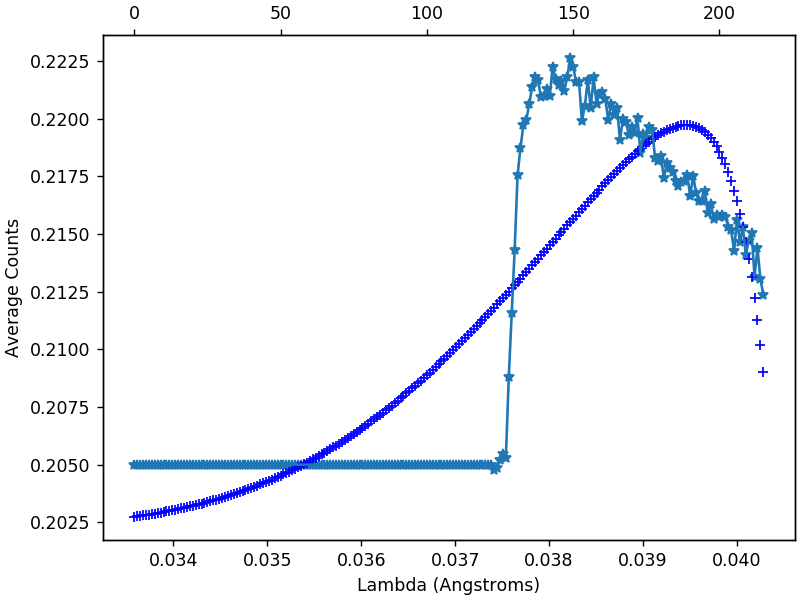

In [38]:
gmodel = Model(march_dollase_basic_fit, missing='drop')
params = gmodel.make_params()
params.add('d_spacing', value=d_spacing, vary=False)
params.add('sigma', value=sigma, vary=False)
params.add('alpha', value=alpha, vary=False)
params.add('a1', value=a1, vary=True)
params.add('a2', value=a2, vary=True)
result = gmodel.fit(counts, params, t=lambda_axis)

a1_calculated = result.params['a1'].value
a2_calculated = result.params['a2'].value

print(f"a1_calculated: {a1_calculated}")
print(f"a2_calculated: {a2_calculated}")

counts_after_fit_4 = march_dollase_basic_fit(lambda_axis, 
                                             d_spacing, 
                                             sigma, 
                                             alpha, 
                                             a1_calculated, 
                                             a2_calculated)

fig, ax = plt.subplots(constrained_layout=True)
ax2 = ax.twiny()

ax.plot(lambda_axis, counts, '*')
ax.plot(lambda_axis, counts_after_fit_4, 'b+')
ax.set_xlabel("Lambda (Angstroms)")
ax.set_ylabel("Average Counts")
ax2.plot(index_axis, counts)

### Fit 5 - d_spacing, sigma, alpha 

In [39]:
a1 = a1_calculated
a2 = a2_calculated

print(f"d_spacing: {d_spacing}")
print(f"a1: {a1}")
print(f"a2: {a2}")
print(f"sigma: {sigma}")
print(f"alpha: {alpha}")

d_spacing: 0.019124384515732937
a1: 0.2021893453857241
a2: 0.013464863190244996
sigma: 0.0022808100578752695
alpha: 0.0007740995853842219


d_spcaing_calculated: 0.019157165232247808
sigma_calculated: 0.0022564593758114494
alpha_calculated: 0.0007978920706228032


<IPython.core.display.Javascript object>


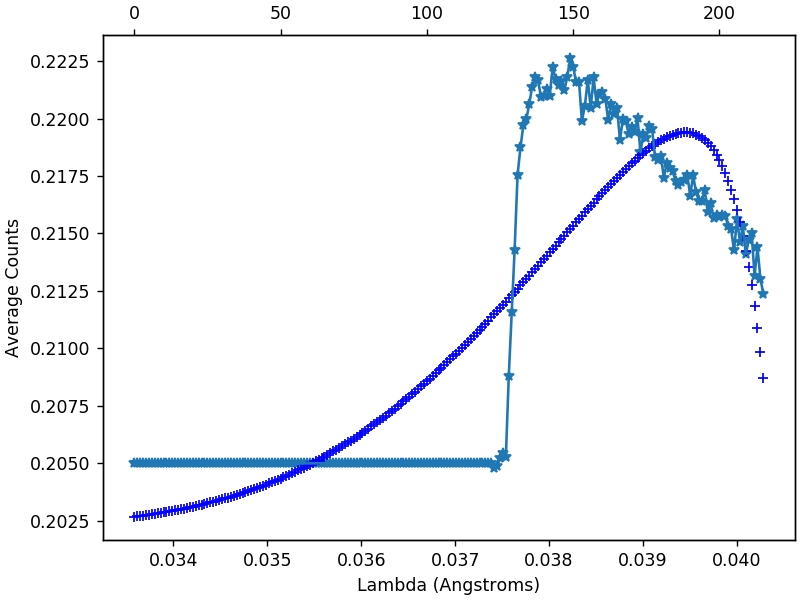

In [40]:
gmodel = Model(march_dollase_basic_fit, missing='drop')
params = gmodel.make_params()
params.add('d_spacing', value=d_spacing, vary=True)
params.add('sigma', value=sigma, vary=True)
params.add('alpha', value=alpha, vary=True)
params.add('a1', value=a1, vary=False)
params.add('a2', value=a2, vary=False)
result = gmodel.fit(counts, params, t=lambda_axis)

d_spacing_calculated = result.params['d_spacing'].value
sigma_calculated = result.params['sigma'].value
alpha_calculated = result.params['alpha'].value

print(f"d_spcaing_calculated: {d_spacing_calculated}")
print(f"sigma_calculated: {sigma_calculated}")
print(f"alpha_calculated: {alpha_calculated}")

counts_after_fit_5 = march_dollase_basic_fit(lambda_axis, 
                                             d_spacing_calculated, 
                                             sigma_calculated, 
                                             alpha_calculated, 
                                             a1, 
                                             a2)

fig, ax = plt.subplots(constrained_layout=True)
ax2 = ax.twiny()

ax.plot(lambda_axis, counts, '*')
ax.plot(lambda_axis, counts_after_fit_5, 'b+')
ax.set_xlabel("Lambda (Angstroms)")
ax.set_ylabel("Average Counts")
ax2.plot(index_axis, counts)

### Fit 6 - d_spacing, sigma, alpha, a1, a2 

In [41]:
d_spacing = d_spacing_calculated
sigma = sigma_calculated
alpha = alpha_calculated

print(f"d_spacing: {d_spacing}")
print(f"a1: {a1}")
print(f"a2: {a2}")
print(f"sigma: {sigma}")
print(f"alpha: {alpha}")

d_spacing: 0.019157165232247808
a1: 0.2021893453857241
a2: 0.013464863190244996
sigma: 0.0022564593758114494
alpha: 0.0007978920706228032


d_spcaing_calculated: 0.019804099592921977
sigma_calculated: 0.001431743110590535
alpha_calculated: 22.444457493813637
a1_calculated: 0.20421384273579596
a2_calculated: 199.93470973857615


<IPython.core.display.Javascript object>


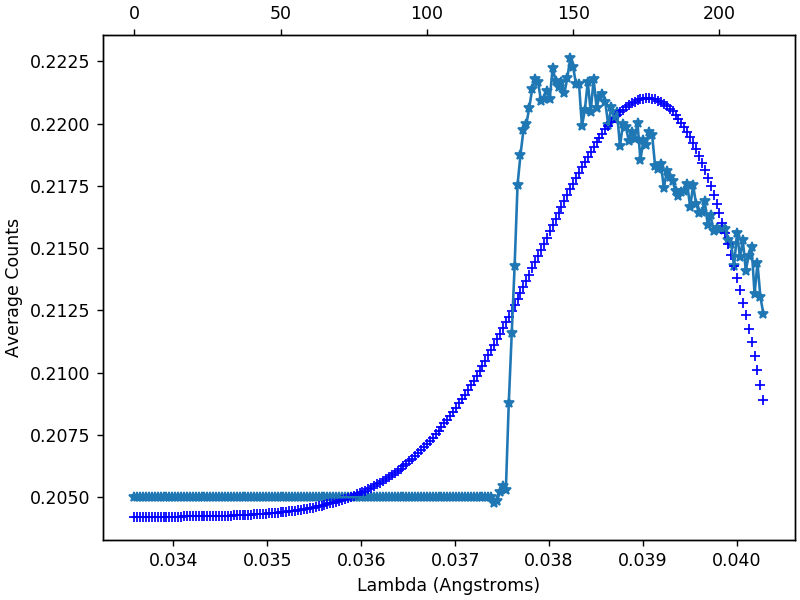

In [43]:
gmodel = Model(march_dollase_basic_fit, missing='drop')
params = gmodel.make_params()
params.add('d_spacing', value=d_spacing, vary=True)
params.add('sigma', value=sigma, vary=True)
params.add('alpha', value=alpha, vary=True)
params.add('a1', value=a1, vary=True)
params.add('a2', value=a2, vary=True)
result = gmodel.fit(counts, params, t=lambda_axis)

d_spacing_calculated = result.params['d_spacing'].value
sigma_calculated = result.params['sigma'].value
alpha_calculated = result.params['alpha'].value
a1_calculated = result.params['a1'].value
a2_calculated = result.params['a2'].value

print(f"d_spcaing_calculated: {d_spacing_calculated}")
print(f"sigma_calculated: {sigma_calculated}")
print(f"alpha_calculated: {alpha_calculated}")
print(f"a1_calculated: {a1_calculated}")
print(f"a2_calculated: {a2_calculated}")

counts_after_fit_6 = march_dollase_basic_fit(lambda_axis, 
                                             d_spacing_calculated, 
                                             sigma_calculated, 
                                             alpha_calculated, 
                                             a1_calculated, 
                                             a2_calculated)

fig, ax = plt.subplots(constrained_layout=True)
ax2 = ax.twiny()

ax.plot(lambda_axis, counts, '*')
ax.plot(lambda_axis, counts_after_fit_6, 'b+')
ax.set_xlabel("Lambda (Angstroms)")
ax.set_ylabel("Average Counts")
ax2.plot(index_axis, counts)